In [5]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 14s 3us/step


In [7]:
print(train_labels)


[9 0 0 ... 3 0 5]


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [9]:
print(train_images.shape)


(60000, 28, 28)


In [10]:
 print(test_images.shape)


(10000, 28, 28)


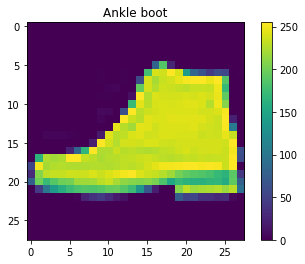

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[42])
plt.colorbar()
plt.grid(False)
plt.title(class_names[train_labels[42]])
plt.show()


In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0


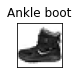

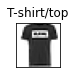

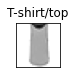

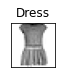

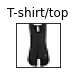

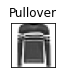

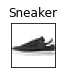

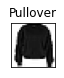

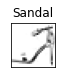

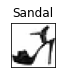

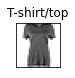

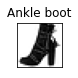

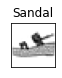

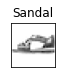

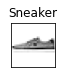

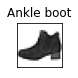

In [14]:
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.subplots_adjust(hspace=.3)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
    plt.show()


In [15]:
X_train = train_images.reshape((train_images.shape[0], 28, 28, 1))
X_test = test_images.reshape((test_images.shape[0], 28, 28, 1))
print(X_train.shape)


(60000, 28, 28, 1)


In [16]:
tf.random.set_seed(42)


In [17]:
from tensorflow.keras import datasets, layers, models, losses
model = models.Sequential()


2022-08-02 14:26:36.979031: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-02 14:26:36.979577: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-02 14:26:36.980485: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mk-System-Product-Name): /proc/driver/nvidia/version does not exist
2022-08-02 14:26:36.985535: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))


In [19]:
model.add(layers.MaxPooling2D((2, 2)))


In [20]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [21]:
model.add(layers.MaxPooling2D((2, 2)))


In [22]:
 model.add(layers.Conv2D(128, (3, 3), activation='relu'))


In [23]:
 model.add(layers.Flatten())


In [24]:
 model.add(layers.Dense(64, activation='relu'))


In [25]:
model.add(layers.Dense(10, activation='softmax'))


In [26]:
 model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])


In [27]:
 model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [28]:
model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=10)


2022-08-02 14:27:31.579152: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
   8/1875 [..............................] - ETA: 49s - loss: 2.2357 - accuracy: 0.2539

2022-08-02 14:27:32.813149: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17981568 exceeds 10% of free system memory.
2022-08-02 14:27:32.813181: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17981568 exceeds 10% of free system memory.
2022-08-02 14:27:32.829267: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17981568 exceeds 10% of free system memory.
2022-08-02 14:27:32.829313: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17981568 exceeds 10% of free system memory.


1875/1875 [==============================] - 35s 18ms/step - loss: 0.4745 - accuracy: 0.8239 - val_loss: 0.3455 - val_accuracy: 0.8769
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3053 - accuracy: 0.8882 - val_loss: 0.3632 - val_accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2605 - accuracy: 0.9042 - val_loss: 0.2875 - val_accuracy: 0.8949
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2300 - accuracy: 0.9151 - val_loss: 0.2731 - val_accuracy: 0.9015
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2067 - accuracy: 0.9226 - val_loss: 0.2593 - val_accuracy: 0.9062
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1846 - accuracy: 0.9317 - val_loss: 0.2577 - val_accuracy: 0.9072
Epoch 7/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1646 - accuracy: 0.9378 - val_loss: 0.2570 - val_accura

In [29]:
test_loss, test_acc = model.evaluate(X_test, test_labels,
verbose=2)
print('Accuracy on test set:', test_acc)


313/313 - 1s - loss: 0.2924 - accuracy: 0.9133 - 913ms/epoch - 3ms/step
Accuracy on test set: 0.9132999777793884


In [30]:
predictions = model.predict(X_test)


313/313 [==============================] - 2s 5ms/step


In [31]:
print(predictions[0])


[4.4484355e-12 8.8328749e-09 1.9414855e-11 2.4504075e-12 2.6015168e-10
 7.7840689e-08 1.4196343e-13 6.4248280e-07 7.0420676e-11 9.9999923e-01]


In [32]:
import numpy as np
print('Predicted label for the first test sample: ',
np.argmax(predictions[0]))


Predicted label for the first test sample:  9


In [33]:
def plot_image_prediction(i, images, predictions, labels, class_names):
    plt.subplot(1,2,1)
    plt.imshow(images[i], cmap=plt.cm.binary)
    prediction = np.argmax(predictions[i])
    color = 'blue' if prediction == labels[i] else 'red'
    plt.title(f"{class_names[labels[i]]} (predicted {class_names[prediction]})", color=color)
    plt.subplot(1,2,2)
    plt.grid(False)
    plt.xticks(range(10))
    plot = plt.bar(range(10), predictions[i], color="#777777")
    plt.ylim([0, 1])
    plot[prediction].set_color('red')
    plot[labels[i]].set_color('blue')
    plt.show()


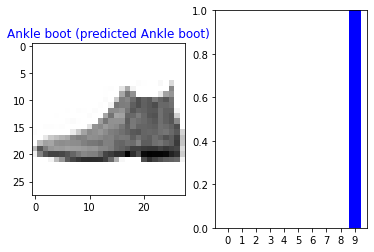

In [34]:
plot_image_prediction(0, test_images, predictions, test_labels, class_names)


In [35]:
filters, _ = model.layers[2].get_weights()


In [36]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)


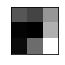

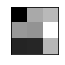

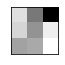

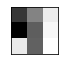

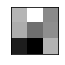

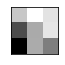

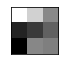

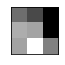

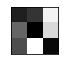

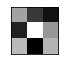

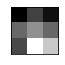

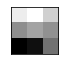

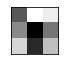

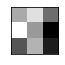

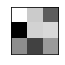

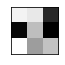

In [37]:
n_filters = 16
for i in range(n_filters):
    filter = filters[:, :, :, i]
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(filter[:, :, 0], cmap='gray')
    plt.show()


In [41]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
datagen = ImageDataGenerator(horizontal_flip=True)

In [42]:
def generate_plot_pics(datagen, original_img, save_prefix):
    folder = 'aug_images'
    i = 0
    for batch in datagen.flow(original_img.reshape((1, 28, 28, 1)), batch_size=1, save_to_dir=folder, save_prefix=save_prefix, save_format='jpeg'):
        i += 1
        if i > 2:
            break
    plt.subplot(2, 2, 1, xticks=[],yticks=[])
    plt.imshow(original_img)
    plt.title("Original")
    i = 1
    for file in os.listdir(folder):
        if file.startswith(save_prefix):
            plt.subplot(2, 2, i + 1, xticks=[],yticks=[])
            aug_img = load_img(folder + "/" + file)
            plt.imshow(aug_img)
            plt.title(f"Augmented {i}")
            i += 1
    plt.show()

In [43]:
generate_plot_pics(datagen, train_images[0], 'horizontal_flip')

FileNotFoundError: [Errno 2] No such file or directory: 'aug_images/horizontal_flip_0_5662.jpeg'

In [44]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
generate_plot_pics(datagen, train_images[0], 'hv_flip')

FileNotFoundError: [Errno 2] No such file or directory: 'aug_images/hv_flip_0_441.jpeg'

In [45]:
datagen = ImageDataGenerator(rotation_range=30)
generate_plot_pics(datagen, train_images[0], 'rotation')

FileNotFoundError: [Errno 2] No such file or directory: 'aug_images/rotation_0_3385.jpeg'

In [46]:
datagen = ImageDataGenerator(width_shift_range=8)
generate_plot_pics(datagen, train_images[0], 'width_shift')

FileNotFoundError: [Errno 2] No such file or directory: 'aug_images/width_shift_0_4081.jpeg'

In [ ]:
datagen = ImageDataGenerator(width_shift_range=8, height_shift_range=8)
generate_plot_pics(datagen, train_images[0], 'width_height_shift')

In [47]:
n_small = 500
X_train = X_train[:n_small]
train_labels = train_labels[:n_small]
print(X_train.shape)

(500, 28, 28, 1)


In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [49]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [50]:
model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=20, batch_size=40)

Epoch 1/20
13/13 [==============================] - 2s 108ms/step - loss: 2.0069 - accuracy: 0.3300 - val_loss: 1.5974 - val_accuracy: 0.3579
Epoch 2/20
13/13 [==============================] - 1s 107ms/step - loss: 1.3587 - accuracy: 0.4840 - val_loss: 1.2414 - val_accuracy: 0.5318
Epoch 3/20
13/13 [==============================] - 1s 98ms/step - loss: 0.9758 - accuracy: 0.6780 - val_loss: 0.9527 - val_accuracy: 0.6803
Epoch 4/20
13/13 [==============================] - 1s 86ms/step - loss: 0.7251 - accuracy: 0.7580 - val_loss: 0.7879 - val_accuracy: 0.7271
Epoch 5/20
13/13 [==============================] - 1s 92ms/step - loss: 0.6252 - accuracy: 0.8020 - val_loss: 0.7541 - val_accuracy: 0.7276
Epoch 6/20
13/13 [==============================] - 1s 84ms/step - loss: 0.5171 - accuracy: 0.8240 - val_loss: 0.8521 - val_accuracy: 0.7102
Epoch 7/20
13/13 [==============================] - 1s 103ms/step - loss: 0.4791 - accuracy: 0.8320 - val_loss: 0.7001 - val_accuracy: 0.7568
Epoch 8/20

In [51]:
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=2)

313/313 - 1s - loss: 0.7406 - accuracy: 0.7954 - 835ms/epoch - 3ms/step


In [52]:
datagen = ImageDataGenerator(height_shift_range=3, horizontal_flip=True)

In [53]:
 model_aug = tf.keras.models.clone_model(model)

In [54]:
model_aug.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [55]:
train_generator = datagen.flow(X_train, train_labels, seed=42, batch_size=40)

In [56]:
model_aug.fit(train_generator, epochs=50, validation_data=(X_test, test_labels))

Epoch 1/50
13/13 [==============================] - 2s 126ms/step - loss: 2.0912 - accuracy: 0.1960 - val_loss: 1.6572 - val_accuracy: 0.3403
Epoch 2/50
13/13 [==============================] - 1s 92ms/step - loss: 1.4289 - accuracy: 0.4880 - val_loss: 1.1627 - val_accuracy: 0.5604
Epoch 3/50
13/13 [==============================] - 1s 98ms/step - loss: 1.1152 - accuracy: 0.5900 - val_loss: 0.9136 - val_accuracy: 0.6993
Epoch 4/50
13/13 [==============================] - 1s 92ms/step - loss: 0.8631 - accuracy: 0.6920 - val_loss: 0.9112 - val_accuracy: 0.6510
Epoch 5/50
13/13 [==============================] - 1s 94ms/step - loss: 0.8327 - accuracy: 0.6980 - val_loss: 0.8145 - val_accuracy: 0.7009
Epoch 6/50
13/13 [==============================] - 1s 101ms/step - loss: 0.7084 - accuracy: 0.7700 - val_loss: 0.7665 - val_accuracy: 0.7349
Epoch 7/50
13/13 [==============================] - 1s 102ms/step - loss: 0.6189 - accuracy: 0.7820 - val_loss: 0.7560 - val_accuracy: 0.7403
Epoch 8/50

In [57]:
test_loss, test_acc = model_aug.evaluate(X_test, test_labels, verbose=2)

313/313 - 1s - loss: 0.8300 - accuracy: 0.7940 - 1s/epoch - 4ms/step


In [58]:
from tensorboard.plugins.hparams import api as hp

In [76]:
HP_HIDDEN = hp.HParam('hidden_size', hp.Discrete([64, 32, 16]))
HP_EPOCHS = hp.HParam('epochs', hp.Discrete([20, 50]))
HP_LEARNING_RATE = hp.HParam('learning_rate', hp.RealInterval(0.01, 0.4))

In [86]:
def train_test_model(hparams, logdir):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(units=hparams[HP_HIDDEN], activation='relu'))
    model.add(layers.Dense(1, activation='softmax'))
    model.compile(loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(hparams[HP_LEARNING_RATE]), metrics=['mean_squared_error'])
    model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=hparams[HP_EPOCHS])
    _, mse = model.evaluate(X_test, test_labels, verbose=2)
    pred = model.predict(X_test)
    r2 = r2_score(test_labels, pred)
    return mse, r2

In [87]:
def run(hparams, logdir):
    with tf.summary.create_file_writer(logdir).as_default():
        hp.hparams_config(hparams=[HP_HIDDEN, HP_EPOCHS, HP_LEARNING_RATE], metrics=[hp.Metric('mean_squared_error', display_name='mse'), hp.Metric('r2', display_name='r2')],)
    mse, r2 = train_test_model(hparams, logdir)
    tf.summary.scalar('mean_squared_error', mse, step=1)
    tf.summary.scalar('r2', r2, step=1)

In [88]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
session_num = 0
for hidden in HP_HIDDEN.domain.values:
    for epochs in HP_EPOCHS.domain.values:
        for learning_rate in tf.linspace(HP_LEARNING_RATE.domain.min_value, HP_LEARNING_RATE.domain.max_value, 5):
            hparams = {HP_HIDDEN: hidden, HP_EPOCHS: epochs, HP_LEARNING_RATE: float("%.2f"%float(learning_rate)), }
            run_name = "run-%d" % session_num
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            run(hparams, 'logs/hparam_tuning/' + run_name)
            session_num += 1

--- Starting trial: run-0
{'hidden_size': 16, 'epochs': 20, 'learning_rate': 0.01}
Epoch 1/20
16/16 [==============================] - 2s 85ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 2/20
16/16 [==============================] - 1s 68ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 3/20
16/16 [==============================] - 1s 80ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 4/20
16/16 [==============================] - 2s 101ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 5/20
16/16 [==============================] - 1s 71ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 6/20
16/16 [==============================] - 1s 73ms/step - loss: 19.6300 - mean_squ

Epoch 14/20
16/16 [==============================] - 1s 88ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 15/20
16/16 [==============================] - 1s 71ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 16/20
16/16 [==============================] - 2s 108ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 17/20
16/16 [==============================] - 2s 132ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 18/20
16/16 [==============================] - 2s 113ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 19/20
16/16 [==============================] - 1s 99ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
E

16/16 [==============================] - 1s 69ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 43/50
16/16 [==============================] - 1s 62ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 44/50
16/16 [==============================] - 1s 71ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 45/50
16/16 [==============================] - 1s 63ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 46/50
16/16 [==============================] - 1s 67ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 47/50
16/16 [==============================] - 1s 67ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 48/50
16/1

16/16 [==============================] - 1s 67ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 39/50
16/16 [==============================] - 1s 69ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 40/50
16/16 [==============================] - 1s 67ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 41/50
16/16 [==============================] - 1s 72ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 42/50
16/16 [==============================] - 1s 63ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 43/50
16/16 [==============================] - 1s 75ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 44/50
16/1

16/16 [==============================] - 1s 70ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 35/50
16/16 [==============================] - 1s 65ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 36/50
16/16 [==============================] - 1s 67ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 37/50
16/16 [==============================] - 1s 67ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 38/50
16/16 [==============================] - 1s 66ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 39/50
16/16 [==============================] - 1s 69ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 40/50
16/1

Epoch 11/20
16/16 [==============================] - 1s 70ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 12/20
16/16 [==============================] - 1s 62ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 13/20
16/16 [==============================] - 1s 70ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 14/20
16/16 [==============================] - 1s 74ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 15/20
16/16 [==============================] - 1s 74ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 16/20
16/16 [==============================] - 1s 72ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoc

Epoch 18/20
16/16 [==============================] - 1s 65ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 19/20
16/16 [==============================] - 1s 68ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 20/20
16/16 [==============================] - 1s 70ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
313/313 - 1s - loss: 20.5000 - mean_squared_error: 20.5000 - 835ms/epoch - 3ms/step
313/313 [==============================] - 1s 3ms/step
--- Starting trial: run-14
{'hidden_size': 32, 'epochs': 20, 'learning_rate': 0.4}
Epoch 1/20
16/16 [==============================] - 1s 72ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 2/20
16/16 [==============================] - 1s 73ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - va

Epoch 25/50
16/16 [==============================] - 1s 71ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 26/50
16/16 [==============================] - 1s 70ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 27/50
16/16 [==============================] - 1s 94ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 28/50
16/16 [==============================] - 1s 81ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 29/50
16/16 [==============================] - 1s 65ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 30/50
16/16 [==============================] - 1s 81ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoc

16/16 [==============================] - 1s 99ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 22/50
16/16 [==============================] - 1s 82ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 23/50
16/16 [==============================] - 1s 63ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 24/50
16/16 [==============================] - 1s 76ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 25/50
16/16 [==============================] - 1s 67ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 26/50
16/16 [==============================] - 1s 72ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 27/50
16/1

16/16 [==============================] - 2s 126ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 18/50
16/16 [==============================] - 1s 96ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 19/50
16/16 [==============================] - 1s 74ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 20/50
16/16 [==============================] - 1s 96ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 21/50
16/16 [==============================] - 2s 103ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 22/50
16/16 [==============================] - 1s 81ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 23/50
16

Epoch 1/20
16/16 [==============================] - 2s 83ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 2/20
16/16 [==============================] - 1s 81ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 3/20
16/16 [==============================] - 1s 75ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 4/20
16/16 [==============================] - 1s 76ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 5/20
16/16 [==============================] - 1s 72ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 6/20
16/16 [==============================] - 1s 74ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 7/20

Epoch 8/50
16/16 [==============================] - 1s 78ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 9/50
16/16 [==============================] - 1s 80ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 10/50
16/16 [==============================] - 1s 82ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 11/50
16/16 [==============================] - 1s 73ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 12/50
16/16 [==============================] - 1s 80ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 13/50
16/16 [==============================] - 1s 80ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 

Epoch 6/50
16/16 [==============================] - 1s 77ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 7/50
16/16 [==============================] - 1s 80ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 8/50
16/16 [==============================] - 1s 84ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 9/50
16/16 [==============================] - 1s 77ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 10/50
16/16 [==============================] - 1s 88ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 11/50
16/16 [==============================] - 1s 73ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 12

16/16 [==============================] - 1s 96ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 5/50
16/16 [==============================] - 2s 116ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 6/50
16/16 [==============================] - 4s 288ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 7/50
16/16 [==============================] - 3s 197ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 8/50
16/16 [==============================] - 2s 118ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 9/50
16/16 [==============================] - 2s 106ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 10/50
16/1

Epoch 2/50
16/16 [==============================] - 1s 93ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 3/50
16/16 [==============================] - 1s 85ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 4/50
16/16 [==============================] - 1s 92ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 5/50
16/16 [==============================] - 1s 87ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 6/50
16/16 [==============================] - 1s 87ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 7/50
16/16 [==============================] - 2s 105ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 8/5

313/313 [==============================] - 2s 5ms/step
--- Starting trial: run-29
{'hidden_size': 64, 'epochs': 50, 'learning_rate': 0.4}
Epoch 1/50
16/16 [==============================] - 2s 90ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 2/50
16/16 [==============================] - 1s 77ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 3/50
16/16 [==============================] - 1s 83ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 4/50
16/16 [==============================] - 2s 144ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 5/50
16/16 [==============================] - 1s 95ms/step - loss: 19.6300 - mean_squared_error: 19.6300 - val_loss: 20.5000 - val_mean_squared_error: 20.5000
Epoch 6/50
16/16 [==================